In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv('force2020_data.csv')
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


# Step 1: Load and Explore the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [12]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [14]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [16]:
df.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN
18269,2.792922,19.829920,3272.024,0.176627,NaN,NaN


In [18]:
df.shape

(18270, 6)

In [20]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [22]:
df.dtypes

RHOB        float64
GR          float64
DEPTH_MD    float64
NPHI        float64
PEF         float64
DTC         float64
dtype: object

In [24]:
df.isnull().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

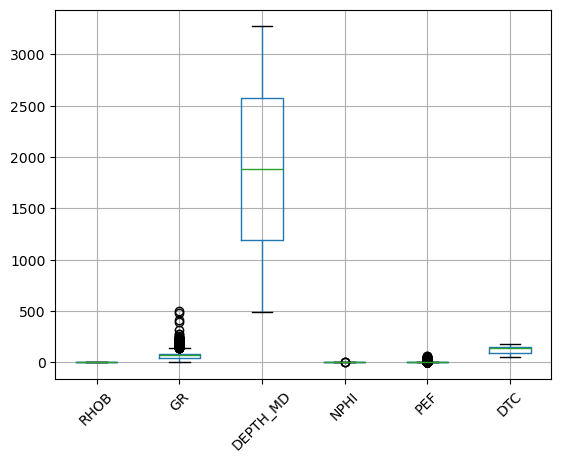

In [26]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

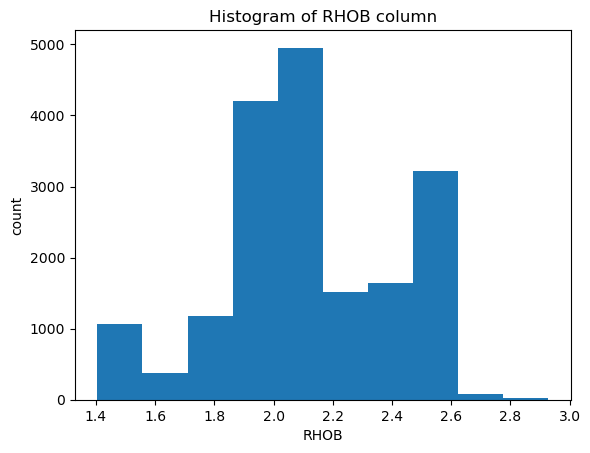

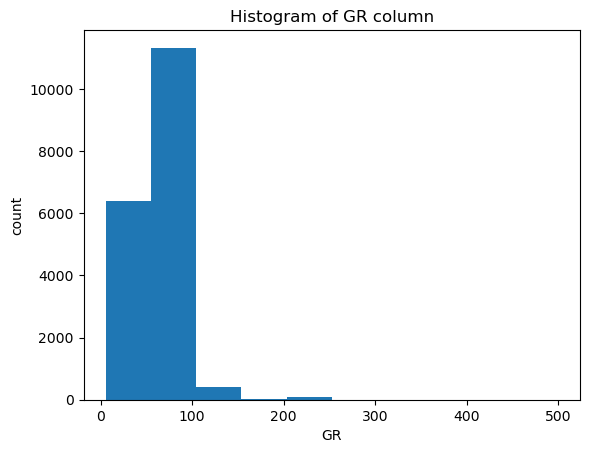

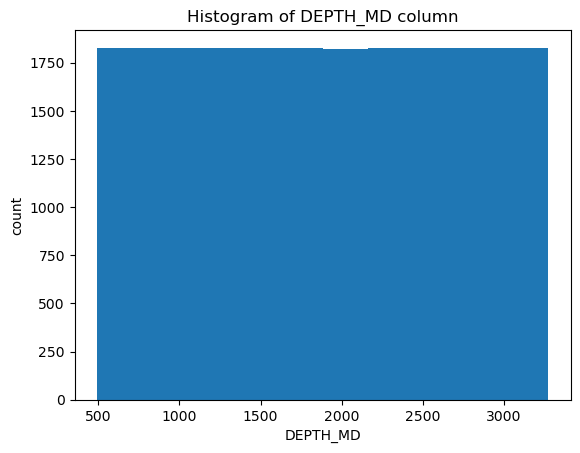

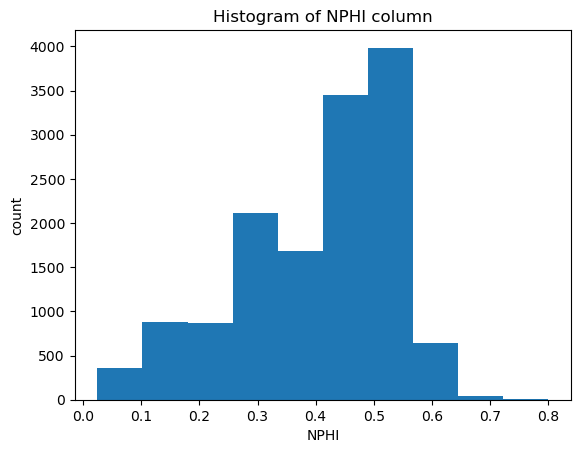

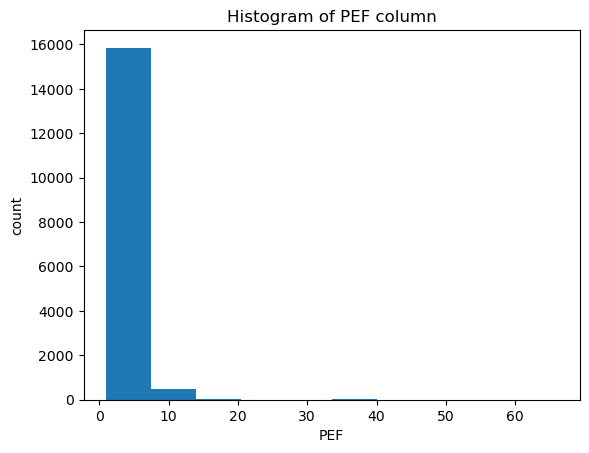

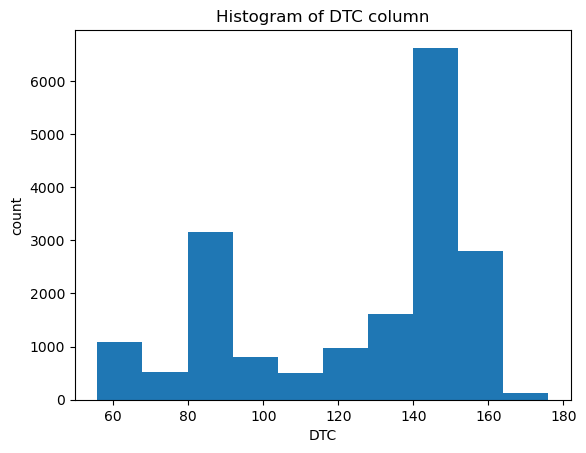

In [27]:
# There are no categorical columns in the dataset
for col in df.columns:
  plt.hist(df[col])
  plt.title("Histogram of {} column".format(col))
  plt.xlabel(col)
  plt.ylabel("count")
  plt.show()

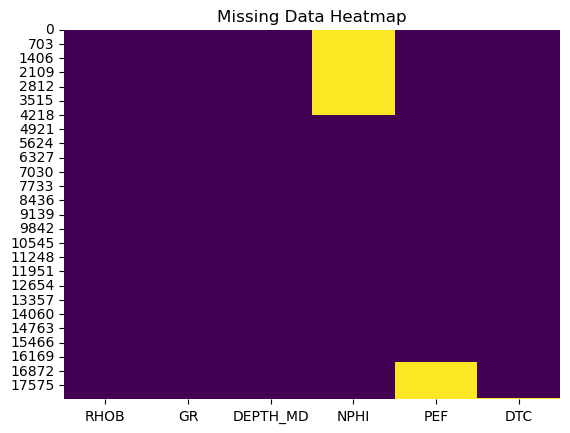

In [29]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [30]:
print(df.duplicated().sum())

0


In [31]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [RHOB, GR, DEPTH_MD, NPHI, PEF, DTC]
Index: []


In [32]:
df = df.dropna(axis=0, how='any')
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [38]:
def remove_outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    data[col] = data[col].clip(upper=ub)
    data[col] = data[col].clip(lower=lb)
    return data[col]

In [40]:
for col in df.columns:
    remove_outliers(df, col)

C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\1244181697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].clip(upper=ub)
C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\1244181697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].clip(lower=lb)
C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\1244181697.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

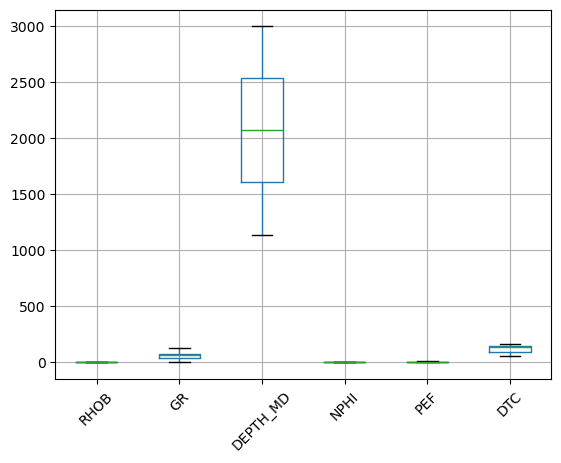

In [42]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [44]:
data = df
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


# Step 2.1: Try K-Means Clustering on the data and visualize the output using only two features

In [47]:
# Select Features for Clustering
features = df[['RHOB', 'GR']]  # Replace with actual column names

In [49]:
features

,RHOB,GR
4238,1.774626,55.892757
4239,1.800986,60.929138
4240,1.817696,62.117264
4241,1.829333,61.010860
4242,1.813854,58.501236
...,...,...
16435,2.468236,90.537521
16436,2.457519,88.819122
16437,2.429228,92.128922
16438,2.425479,95.870255


In [51]:
# Standardize the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-1.49184345, -0.17278329],
       [-1.38706681,  0.02238937],
       [-1.32064647,  0.06843228],
       ...,
       [ 1.11010063,  1.23146093],
       [ 1.09519935,  1.37644717],
       [ 1.21470905,  1.41304675]])

In [53]:
# Choose the Number of Clusters (k)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [54]:
# Replace with the optimal number of clusters
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\134360069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [57]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,2
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,2
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,2
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,2
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,2
...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,0
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,0
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,0
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,0


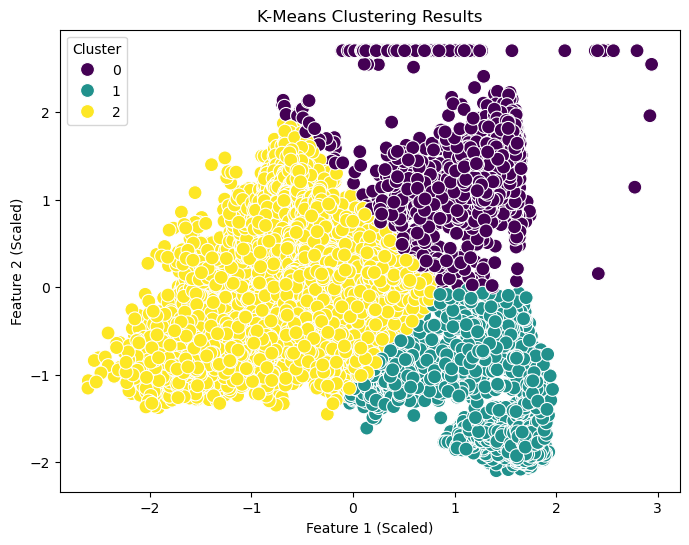

In [59]:
# Visualize the Clusters as 2D Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], y=scaled_features[:, 1],
    hue=df['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.show()


In [60]:
# For Higher Dimensions, Use Principal Component Analysis (PCA) to reduce the dimensions to 2D for visualization.

from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

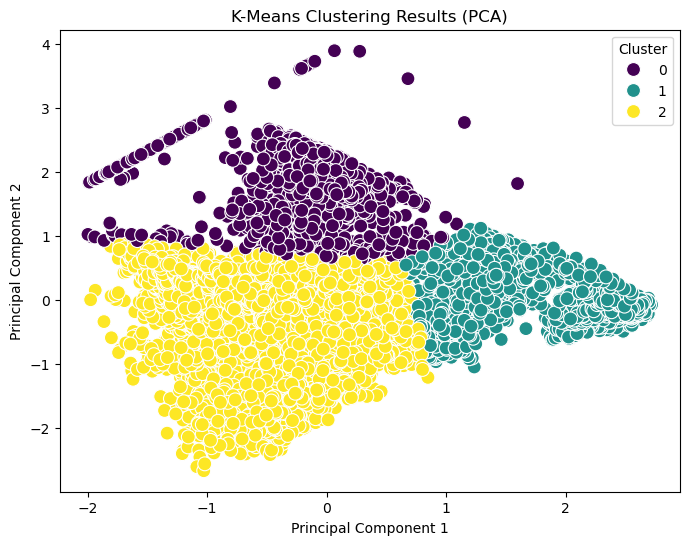

In [63]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_features[:, 0], y=reduced_features[:, 1],
    hue=df['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering Results (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [64]:
# Print the cluster centroids in the original feature space.

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):")
print(pd.DataFrame(centroids, columns=features.columns))


Cluster Centers (Original Scale):
       RHOB         GR
0  2.432455  96.372392
1  2.496639  23.482526
2  1.999708  62.827294


In [67]:
# To find.Silhouette score

from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.56


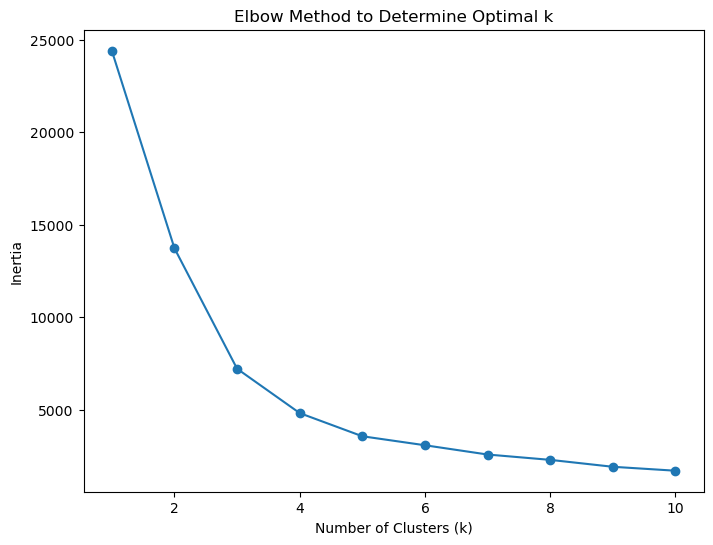

In [68]:
# Plot the Elbow Curve

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [69]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,2
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,2
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,2
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,2
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,2
...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,0
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,0
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,0
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,0


# Step 3.1: Experiment with Different K Values and Plot Results for only two features

In [71]:
# Test different values for k (e.g., 2 to 4 clusters)
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df[f'Cluster_k{k}'] = kmeans.fit_predict(scaled_features)


C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\3208305869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Cluster_k{k}'] = kmeans.fit_predict(scaled_features)
C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\3208305869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'Cluster_k{k}'] = kmeans.fit_predict(scaled_features)
C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\3208305869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

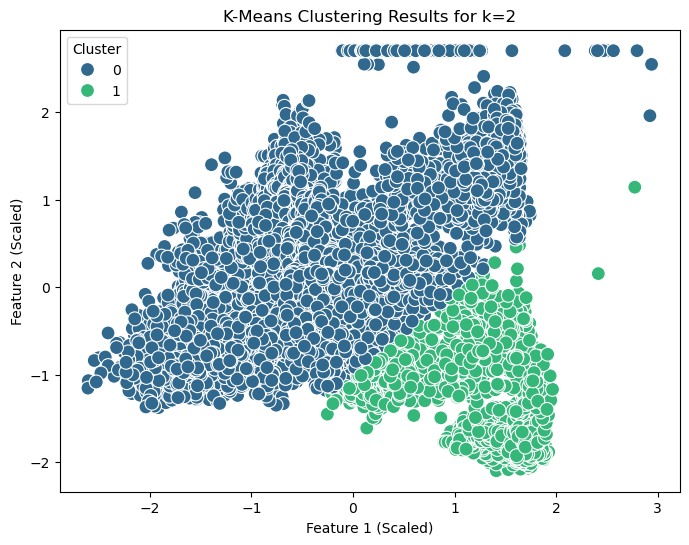

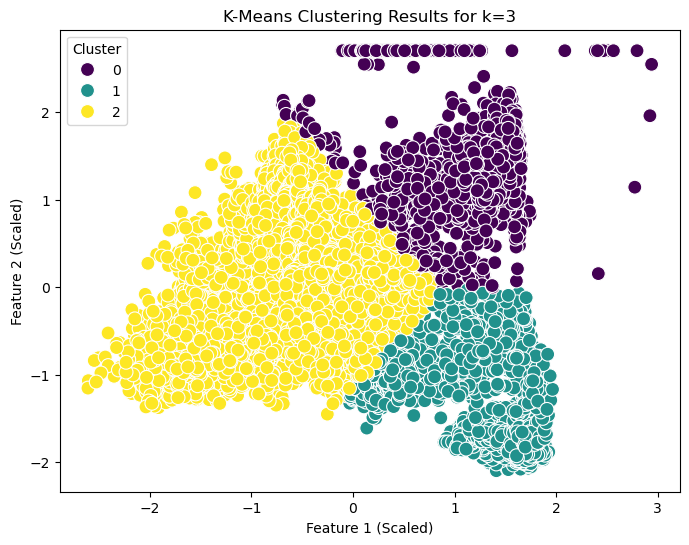

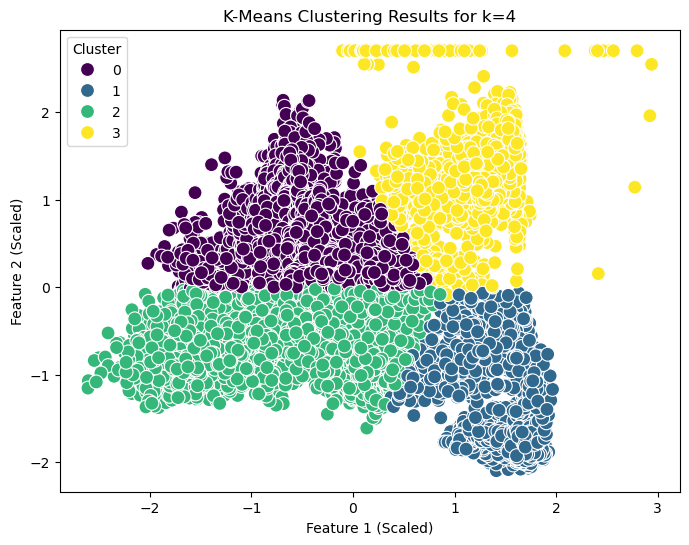

In [72]:
# Plot for k=2, k=3 and k=4 as examples
for k in range(2, 5):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=scaled_features[:, 0], y=scaled_features[:, 1],
        hue=df[f'Cluster_k{k}'], palette='viridis', s=100
    )
    plt.title(f"K-Means Clustering Results for k={k}")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.legend(title="Cluster")
    plt.show()


# Step 2.2: Try K-Means Clustering on the data and visualize the output ALL features

In [74]:
data.drop(columns=['Cluster','Cluster_k2','Cluster_k3','Cluster_k4'], inplace=True)

C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\2163808155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Cluster','Cluster_k2','Cluster_k3','Cluster_k4'], inplace=True)


In [75]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085
...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452


In [76]:
# Standardize the Data
all_scaler = StandardScaler()
all_scaled_features = scaler.fit_transform(data)
all_scaled_features

array([[-1.49184345, -0.17278329, -1.73160542,  2.5236538 , -1.46739163,
         0.86953128],
       [-1.38706681,  0.02238937, -1.73132166,  2.77074358, -1.45830273,
         0.6900418 ],
       [-1.32064647,  0.06843228, -1.73103791,  2.52430037, -1.45777245,
         0.55434993],
       ...,
       [ 1.11010063,  1.23146093,  1.73107958, -0.3562499 ,  0.58497496,
        -1.10591033],
       [ 1.09519935,  1.37644717,  1.73136334, -0.33942988,  0.93627356,
        -1.0956904 ],
       [ 1.21470905,  1.41304675,  1.73164709, -0.2549744 ,  1.48866948,
        -1.0677974 ]])

In [77]:
# Choose the Number of Clusters (k)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_scaled_features)
    inertia.append(kmeans.inertia_)

In [79]:
# Test different values for k (e.g., 2 to 4 clusters)
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data[f'Cluster_k{k}'] = kmeans.fit_predict(all_scaled_features)


C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\2442357353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Cluster_k{k}'] = kmeans.fit_predict(all_scaled_features)
C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\2442357353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Cluster_k{k}'] = kmeans.fit_predict(all_scaled_features)
C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\2442357353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [83]:
# Choose the Number of Clusters (k)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_scaled_features)
    inertia.append(kmeans.inertia_)

In [84]:
# Replace with the optimal number of clusters
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(all_scaled_features)

# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

C:\Users\S Muhammed\AppData\Local\Temp\ipykernel_24064\2255578541.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.labels_


In [85]:
data

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster_k2,Cluster_k3,Cluster_k4,Cluster
4238,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,0,0,0,0
4239,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,0,0,0,0
4240,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,0,0,0,0
4241,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,0,0,0,0
4242,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16435,2.468236,90.537521,2993.256,0.341534,4.699200,86.474564,1,1,3,1
16436,2.457519,88.819122,2993.408,0.351085,4.699200,86.187599,1,1,3,1
16437,2.429228,92.128922,2993.560,0.364982,4.699200,87.797836,1,1,3,1
16438,2.425479,95.870255,2993.712,0.367323,5.224292,88.108452,1,1,3,1


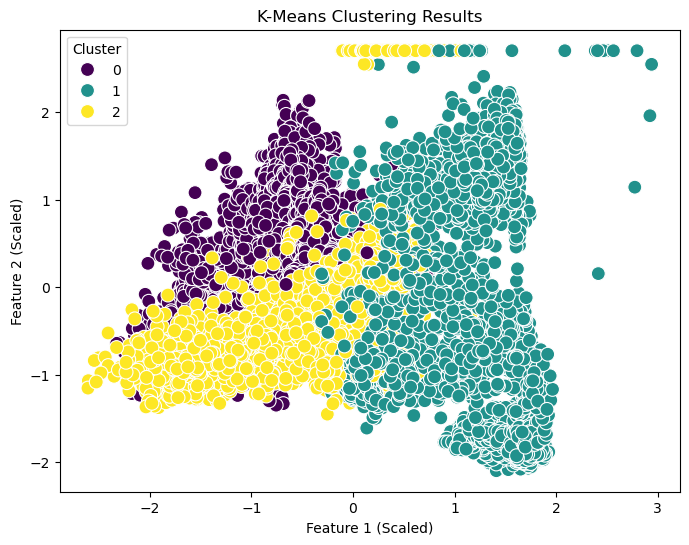

In [86]:
# Visualize the Clusters as 2D Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=all_scaled_features[:, 0], y=all_scaled_features[:, 1],
    hue=data['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.show()


In [87]:
# For Higher Dimensions, Use Principal Component Analysis (PCA) to reduce the dimensions to 2D for visualization.

from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_all_features = pca.fit_transform(all_scaled_features)

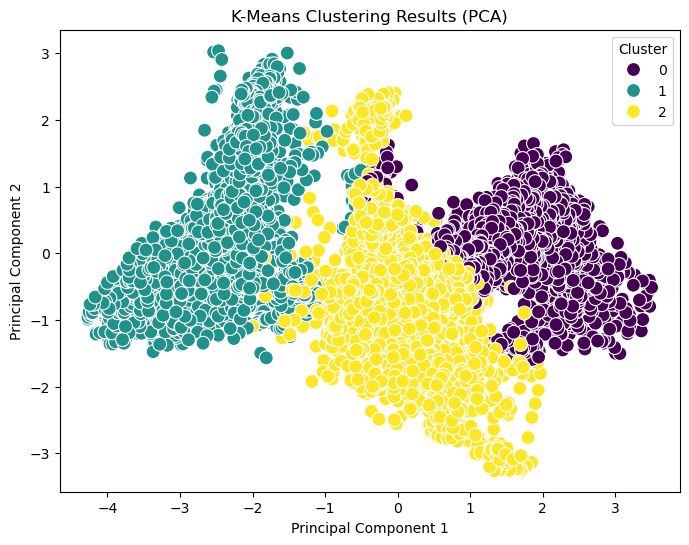

In [88]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_all_features[:, 0], y=reduced_all_features[:, 1],
    hue=data['Cluster'], palette='viridis', s=100
)
plt.title("K-Means Clustering Results (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Step 3.2: Experiment with Different K Values and Plot Results for ALL features

<Figure size 800x600 with 0 Axes>

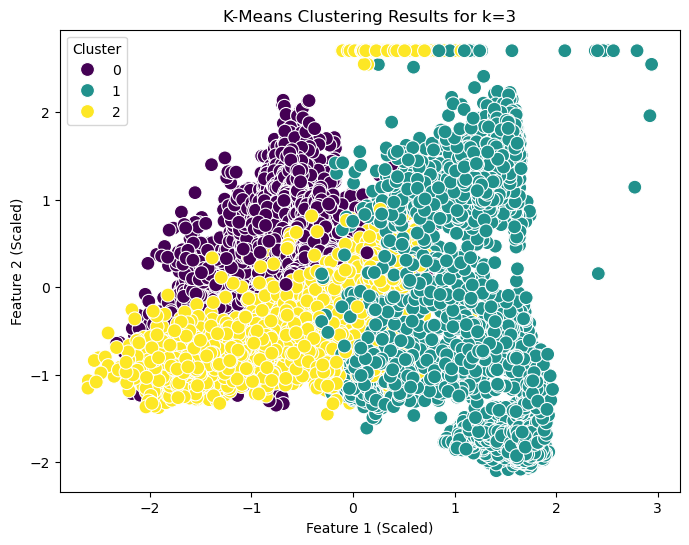

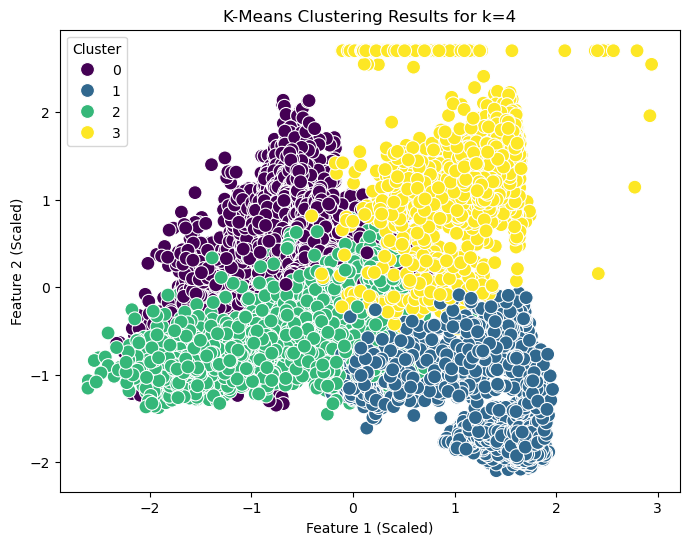

In [109]:
# Plot for k=2, k=3 and k=4 as examples
for k in range(3, 5):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=all_scaled_features[:, 0], y=all_scaled_features[:, 1],
        hue=data[f'Cluster_k{k}'], palette='viridis', s=100
    )
    plt.title(f"K-Means Clustering Results for k={k}")
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")
    plt.legend(title="Cluster")
    plt.show()
